In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip
import seaborn
import random
import math
import scipy
#from jupyterthemes import jtplot
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
%matplotlib inline

In [ ]:
def hs1Delta(t,args):
    """
    Frequency Scanned
    args:[T,Delta0,Detuning,Omega0,noise0,noise1,steps,freq1]
    """
    Delta = 1.0 * args[1] * np.tanh(2 *1.6* np.pi * (t/args[0]-0.5))+args[2]
    #print(type(Delta))
    return Delta

def hs1Omega(t,args):
    """
    Rabi Frequency Scanned
    args:[T,Delta0,Detuning,Omega0,noise0,noise1]
    """
    Omega = 1.0 * args[3] / np.cosh(2 *1.6* np.pi * (t/args[0]-0.5))
    return Omega


0.9999166669685569
CPU times: user 975 ms, sys: 70.4 ms, total: 1.05 s
Wall time: 1.49 s


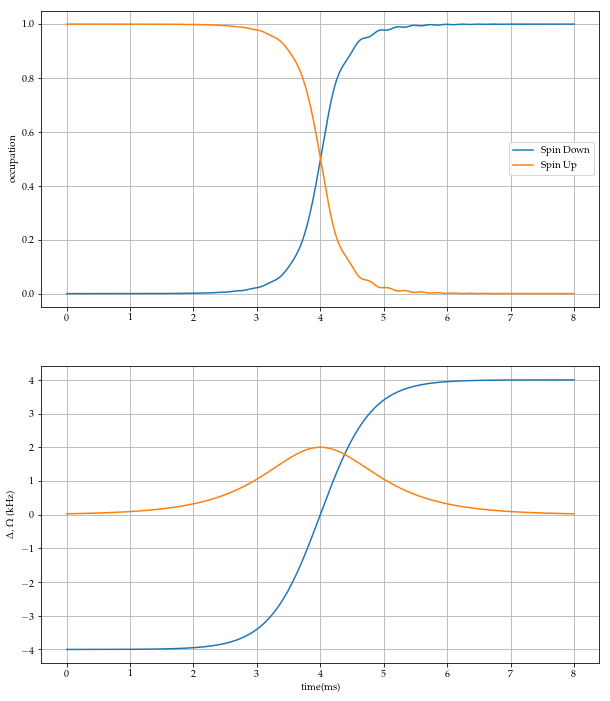

In [3]:
%%time
H=[[(qutip.sigmap()+qutip.sigmam())/2,hs1Omega],[-qutip.sigmap()*qutip.sigmam(),hs1Delta]]
#H=[[(qutip.sigmay())/2,hs1Omega],[-qutip.sigmaz()/2,hs1Delta]]

T=0.008
Delta0=4000.0*2*np.pi
Detuning=0*2100*2*np.pi
Omega0=2000.0*2*np.pi
noise0=1500*2*np.pi
noise1=1000*2*np.pi
steps=1000
freq1=19200
args=[T,Delta0,Detuning,Omega0,noise0,noise1,steps,freq1]

tlist=np.linspace(0,T,500)
expectoper=[qutip.ket2dm(qutip.basis(2,0)),qutip.ket2dm(qutip.basis(2,1))]
s=qutip.mesolve(H, qutip.basis(2,1), tlist, [],
                expectoper,args=args,options=qutip.Options(nsteps=50000))
print(s.expect[0][-1])

fig,ax=plt.subplots(2,1,figsize=(10,12))

ax[0].grid(True)
ax[0].set_ylabel('occupation')
ax[1].set_ylabel('$\Delta$, $\Omega$ (kHz)')
ax[1].set_xlabel('time(ms)')
ax[1].grid(True)
ax[0].plot(tlist*1000,s.expect[0],label='Spin Down')
ax[0].plot(tlist*1000,s.expect[1],label='Spin Up')
ax[0].legend(loc='best')
ax[1].plot(tlist*1000,hs1Delta(tlist,args)/(2*np.pi*1000),tlist*1000,hs1Omega(tlist,args)/(2*1000*np.pi))

In [12]:
np.meshgrid(np.linspace(-10,10,100),np.linspace(0,10,100))

[array([[-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
           9.7979798,  10.       ],
        [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
           9.7979798,  10.       ],
        [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
           9.7979798,  10.       ],
        ...,
        [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
           9.7979798,  10.       ],
        [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
           9.7979798,  10.       ],
        [-10.       ,  -9.7979798,  -9.5959596, ...,   9.5959596,
           9.7979798,  10.       ]]),
 array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ],
        [ 0.1010101,  0.1010101,  0.1010101, ...,  0.1010101,  0.1010101,
          0.1010101],
        [ 0.2020202,  0.2020202,  0.2020202, ...,  0.2020202,  0.2020202,
          0.2020202],
        ...,
        [ 9.7979798,  9.7979798,  9.7979798, ...,  9.7979798,  9.7979798

CPU times: user 1min 10s, sys: 1.22 s, total: 1min 11s
Wall time: 1min 17s


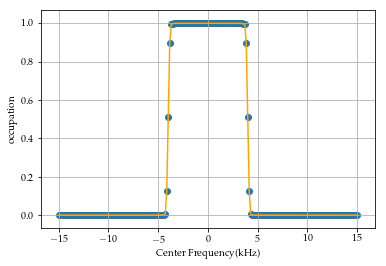

In [4]:
%%time

centerstep=np.linspace(-15*1000*2*np.pi,15*1000*2*np.pi,200)
occlist=[]
for center in centerstep:
    args[2]=center
    occ=qutip.mesolve(H, qutip.basis(2,1), tlist, [], expectoper,args=args).expect[0][-1]
    occlist.append(occ)

occlist1=occlist
plt.grid(True)   
plt.ylabel('occupation')
plt.xlabel('Center Frequency(kHz)')
plt.plot(centerstep/(2*1000*np.pi),occlist,'orange')
plt.scatter(centerstep/(2*1000*np.pi),occlist)

CPU times: user 1min 7s, sys: 968 ms, total: 1min 8s
Wall time: 1min 10s


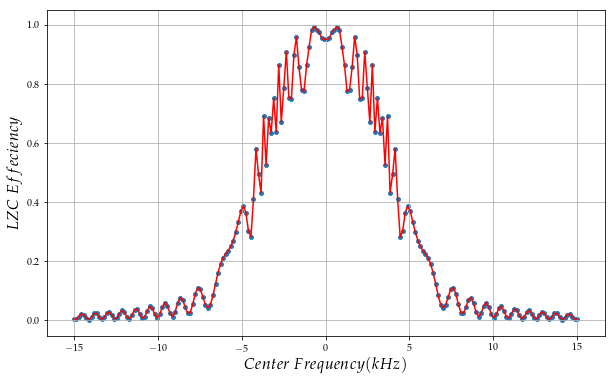

In [5]:
%%time
def ChirpDelta(t,args):
    """
    Frequency Scanned
    args:[T,Delta0,Detuning,Omega0,noise0,noise1,steps,freq1]
    """
    #Delta = 1.0 * args[1] * np.tanh(2 *1.6* np.pi * (t/args[0]-0.5))+args[2]
    Delta=1.0*args[1]*(2*t/args[0]-1)+1*args[2]
    #print(type(Delta))
    return Delta

#plt.plot(tlist,ChirpDelta(tlist,args))

Hchirp=[args[3]*(qutip.sigmap()+qutip.sigmam())/2,[-qutip.sigmap()*qutip.sigmam(),hs1Delta]]
centerstep=np.linspace(-15*1000*2*np.pi,15*1000*2*np.pi,200)
occlist=[]
for center in centerstep:
    args[2]=center
    occ=qutip.mesolve(Hchirp, qutip.basis(2,1), tlist, [], expectoper,args=args).expect[0][-1]
    occlist.append(occ)

occlist2=occlist
plt.figure(figsize=(10,6))
plt.grid(True)
plt.ylabel(r'$LZC\ Effeciency$',fontsize=16)
plt.xlabel(r'$Center\ Frequency(kHz)$',fontsize=16)
plt.plot(centerstep/(2*1000*np.pi),occlist,'red')
plt.scatter(centerstep/(2*1000*np.pi),occlist,s=15)

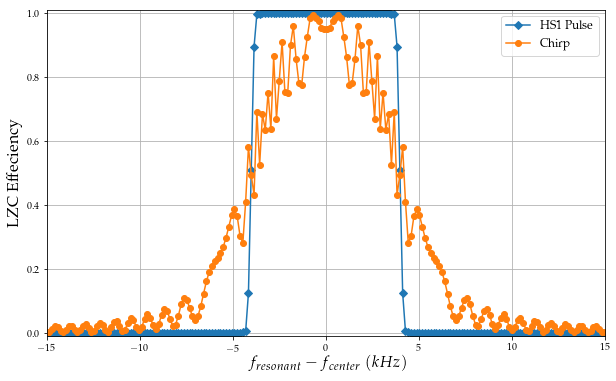

In [6]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlim((-15,15))
plt.ylim((-0.01,1.01))
plt.ylabel(r'LZC Effeciency',fontsize=16)
plt.xlabel(r'$f_{resonant}-f_{center}\ (kHz)$',fontsize=16)
plt.plot(centerstep/(2*1000*np.pi),occlist1,'-D',label=r'HS1 Pulse',markersize=6)
#plt.scatter(centerstep/(2*1000*np.pi),occlist2,s=15)
plt.plot(centerstep/(2*1000*np.pi),occlist2,'-o',label=r'Chirp',markersize=6)
#plt.scatter(centerstep/(2*1000*np.pi),occlist2,s=15)
plt.legend(loc='best',fontsize=12)
#plt.savefig('HS1Pulse.pdf')

occupation of the desired state:  0.7923956892707944
CPU times: user 1.68 s, sys: 101 ms, total: 1.78 s
Wall time: 1.88 s


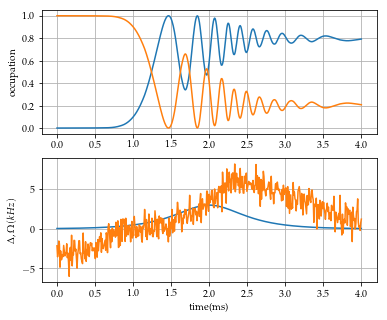

In [7]:
%%time
T=0.004
Delta0=4000.0*2*np.pi
Detuning=0*2100*2*np.pi
Omega0=3000.0*2*np.pi
noise0=0.5*2100*2*np.pi
noise1=2*2100*2*np.pi
steps=500
freq1=1000
args=[T,Delta0,Detuning,Omega0,noise0,noise1,steps,freq1]

def getocc(args):
    tlist=np.linspace(0,args[0],args[6]+1)
    np.random.seed(0)
    H1=hs1Omega(tlist,args)
    H2=hs1Delta(tlist,args)+args[4]*np.random.randn(args[6]+1)+args[5]*np.sin(args[7]*tlist)
    H=[H1[i]*(qutip.sigmap()+qutip.sigmam())/2
       -H2[i]*qutip.sigmap()*qutip.sigmam() for i in range(args[6])] 

    occlist=[[0,1]]
    tgap=args[0]/args[6]
    tmps=qutip.mesolve(H[0], qutip.basis(2,1), [0,tgap], [],args=args)
    occlist.append([qutip.expect(qutip.ket2dm(qutip.basis(2,0)),tmps.states[1]),
                    qutip.expect(qutip.ket2dm(qutip.basis(2,1)),tmps.states[1])])
    for h in H[1:]:
        tmps=qutip.mesolve(h, tmps.states[1], [0,tgap], [],args=args)
        occlist.append([qutip.expect(qutip.ket2dm(qutip.basis(2,0)),tmps.states[1]),
                        qutip.expect(qutip.ket2dm(qutip.basis(2,1)),tmps.states[1])])

    occlist=np.array(occlist)
    return occlist,H1,H2,tlist

occlist,H1,H2,tlist=getocc(args)
print('occupation of the desired state: ',occlist[-1][0])
fig,ax=plt.subplots(2,1,figsize=(6,5))
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_ylabel('occupation')
ax[1].set_xlabel('time(ms)')
ax[1].set_ylabel('$\Delta,\Omega(kHz)$')
ax[0].plot(tlist*1000,occlist[:,0],tlist*1000,occlist[:,1])
ax[1].plot(tlist*1000,H1/(2*1000*np.pi),tlist*1000,H2/(2*1000*np.pi))

In [8]:
%%time
def getdet(detuning,args):
    args=args.copy()
    occdetlist=[]
    for detun in detuning:
        args[2]=detun
        occlist,_,_,_=getocc(args)
        occdetlist.append(occlist[-1][0])
    return occdetlist

detuning=np.linspace(-10*1000*2*np.pi,10*1000*2*np.pi,100)
occdetlist=getdet(detuning,args)

CPU times: user 2min 52s, sys: 2.13 s, total: 2min 55s
Wall time: 3min 3s


ValueError: x and y must have same first dimension, but have shapes (200,) and (501, 2)

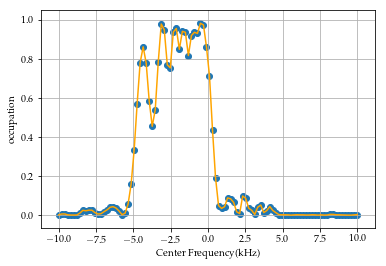

In [10]:
plt.grid(True)
plt.ylabel('occupation')
plt.xlabel('Center Frequency(kHz)')
plt.plot(detuning/(2*np.pi*1000),occdetlist,'orange')
plt.scatter(detuning/(2*np.pi*1000),occdetlist)
plt.plot(centerstep/(2*1000*np.pi),occlist0,'r')

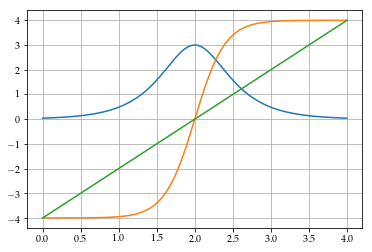

In [11]:
#H1=[1000*2*np.pi]*len(tlist)
args[2]=0
H11=hs1Omega(tlist,args)
H12=Omega0
H21=hs1Delta(tlist,args)
H22=ChirpDelta(tlist,args)
Hhs1=[H11[i]*(qutip.sigmap()+qutip.sigmam())/2-H21[i]*qutip.sigmap()*qutip.sigmam() for i in range(len(tlist))]
Hchirp=[H12*(qutip.sigmap()+qutip.sigmam())/2-H22[i]*qutip.sigmap()*qutip.sigmam() for i in range(len(tlist))]
plt.grid(True)
plt.plot(tlist*1000,H11/(2*np.pi*1000))
plt.plot(tlist*1000,H21/(2*np.pi*1000))
plt.plot(tlist*1000,H22/(2*np.pi*1000))

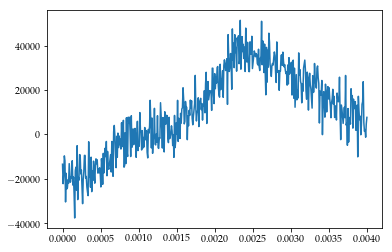

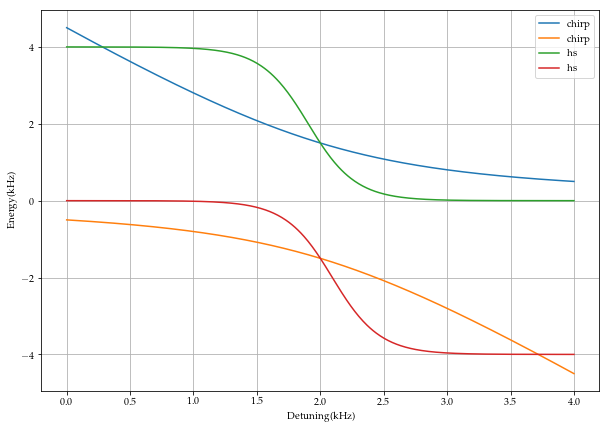

In [13]:
energyhighhs=[]
energylowhs=[]
energyhighchirp=[]
energylowchirp=[]

for i in range(len(tlist)):
    energyhighhs.append(np.max(Hhs1[i].eigenstates()[0])/(2*np.pi*1000))
    energylowhs.append(np.min(Hhs1[i].eigenstates()[0])/(2*np.pi*1000))
    energyhighchirp.append(np.max(Hchirp[i].eigenstates()[0])/(2*np.pi*1000))
    energylowchirp.append(np.min(Hchirp[i].eigenstates()[0])/(2*np.pi*1000))    

plt.plot(tlist,H2)
plt.figure(figsize=(10,7))
plt.grid(True)
plt.xlabel('Detuning(kHz)')
plt.ylabel('Energy(kHz)')
plt.plot(tlist*1000,energyhighchirp,label='chirp')
plt.plot(tlist*1000,energylowchirp,label='chirp')
plt.plot(tlist*1000,energyhighhs,label='hs')
plt.plot(tlist*1000,energylowhs,label='hs')
plt.legend(loc='best')

In [34]:
def pulse(phi0,t,Omega,w):
    U1=np.array([[np.exp(1j*phi0),0],[0,1]])
    U2=np.array([[np.cos(Omega*t/2),-1j*np.sin(Omega*t/2)],[-1j*np.sin(Omega*t/2),np.cos(Omega*t/2)]])
    U3=np.array([[np.exp(-1j*(phi0+w*t)),0],[0,1]])
#     print(phi0+w*t)
#     print(U3)
#     print(U2)
#     print(U1)
    #print(np.round(np.dot(U2,U1),4))
    return np.dot(np.dot(U3,U2),U1)

Omega=3000.0054237555596
w=2*np.pi*6.8*10**9
phi0=0.*np.pi
t1=0.25*2*np.pi/Omega
print(np.pi/Omega,t1)

pulse(phi0,t1,Omega,w)

0.0010471956579521738 0.0005235978289760869


array([[ 0.0575277 -0.70476277j, -0.70476277-0.0575277j ],
       [ 0.        -0.70710678j,  0.70710678+0.j        ]])

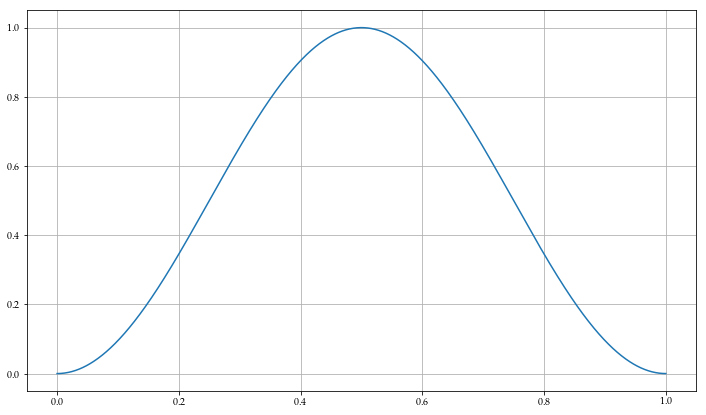

In [35]:
Omega=2*np.pi*3000.003832
w=2*np.pi*6.8*10**9
phi0=0*np.pi
timelist=np.linspace(0,1,1000)
ocu=[]
for i in timelist:
    pulse1=pulse(phi0,i*2*np.pi/Omega,Omega,w)
    state=np.dot(pulse1,np.array([[0,1]]).T)
    ocu.append(np.abs(state[0,0])**2)
plt.figure(figsize=(12,7))
plt.grid(True)
plt.plot(timelist,ocu)
#pulse2=pulse(phi,np.pi/Omega,Omega,w)

In [38]:
phi0=0.*np.pi
phi1=0.*np.pi
w=2*np.pi*6.8*10**9
Omega=3000.0054237555596
#print(0.5*np.pi*w/Omega%(2*np.pi))
pulse1=pulse(phi0,0.125*2*np.pi/Omega,Omega,w)
pulse2=pulse(phi0+w*0.125*2*np.pi/Omega+phi1,0.125*2*np.pi/Omega,Omega,w)
u1=np.dot(pulse2,pulse1)
#print(u1)
sigmaz=np.array([[1,0],[0,-1]])
# print(u1)
# print(u1.conj().T)
sigy=np.dot(np.dot(u1.conj().T,sigmaz),u1)
print(np.round(sigy,6))

phi0=0.*np.pi
phi1=0.5*np.pi
t=0.5*2*np.pi/Omega
t1=0.25*2*np.pi/Omega
Omega=3000.0054237555596
#print(0.5*np.pi*w/Omega%(2*np.pi))
pulse1=pulse(phi0,t1,Omega,w)
pulse2=pulse(phi0+w*(t1+0.*np.pi/w)+phi1,t-t1,Omega,w)
u1=np.dot(pulse2,pulse1)
print(np.dot(u1.conj().T,sigmaz))
sigmaz=np.array([[1,0],[0,-1]])
sigx=np.dot(np.dot(u1.conj().T,sigmaz),u1)
print(np.round(sigx,6))

np.round(np.dot(sigx,sigy),4)
#np.round(np.dot(sigx,sigx),4)

[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]
[[-0.41229436+0.5744679j -0.5       -0.5j      ]
 [ 0.41229436-0.5744679j -0.5       -0.5j      ]]
[[-0.+0.j -1.-0.j]
 [-1.+0.j  0.+0.j]]


array([[-0.-1.j, -0.+0.j],
       [-0.+0.j, -0.+1.j]])

In [186]:
# pulse(0*np.pi,0.25*2*np.pi/Omega,Omega,w)
# pulse(0.5*np.pi,0.25*2*np.pi/Omega,Omega,w)
# pulse(1*np.pi,0.25*2*np.pi/Omega,Omega,w)
phi0=0*np.pi
phi1=0.*np.pi
Omega=3000.0054237555596
#print(0.5*np.pi*w/Omega%(2*np.pi))
pulse1=pulse(phi0,0.25*2*np.pi/Omega,Omega,w)
pulse2=pulse(phi0+w*0.125*2*np.pi/Omega+phi1,0.125*2*np.pi/Omega,Omega,w)
u1=pulse1#np.dot(pulse2,pulse1)
#print(u1)
sigmaz=np.array([[1,0],[0,-1]])
sigy=np.dot(np.dot(u1.conj().T,sigmaz),u1)
print(np.round(sigy,6))

[[ 0.+0.j  0.-1.j]
 [ 0.+1.j -0.+0.j]]


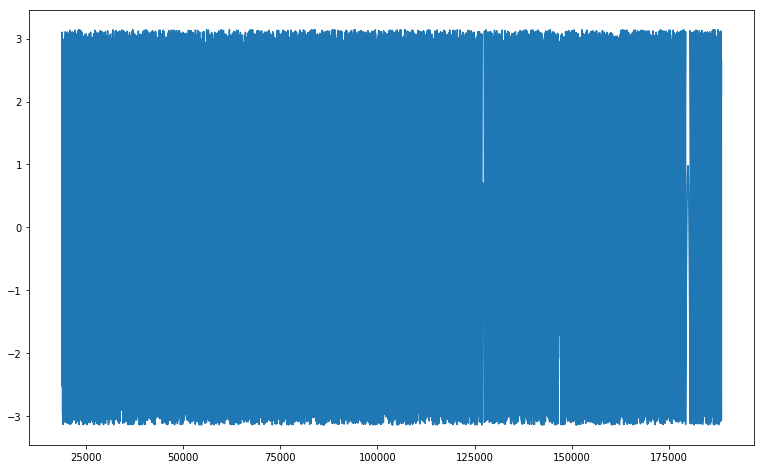

In [127]:
Omega1=np.linspace(2*np.pi*3000,2*np.pi*30000,56000)
plt.figure(figsize=(13,8))
plt.plot(Omega1,np.angle(np.exp(-1j*w*0.25*2*np.pi/Omega1)))

In [114]:
def pulse(phi,t,Omega,w):
    U1=np.array([[np.exp(1j*phi),0],[0,1]])
    U2=np.array([[np.cos(Omega*t/2),-1j*np.sin(Omega*t/2)],[-1j*np.sin(Omega*t/2),np.cos(Omega*t/2)]])
    U3=np.array([[np.exp(-1j*(phi+w*t)),0],[0,1]])
    print(U2)
    print(U1)
    return np.dot(np.dot(U3,U2),U1)

pulse(0.5*np.pi,0.25*2*np.pi/Omega,Omega,w)

[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]
[[6.123234e-17+1.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 1.000000e+00+0.j]]


array([[ 0.70710678-5.39966036e-10j, -0.70710678+5.39965993e-10j],
       [ 0.70710678-4.32978028e-17j,  0.70710678+0.00000000e+00j]])

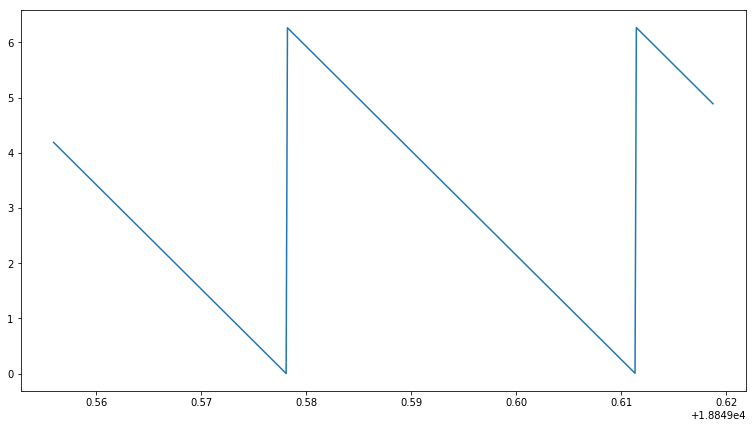

In [148]:
Omega1=np.linspace(2*np.pi*3000,2*np.pi*3000.01,500)
plt.figure(figsize=(13,7))
plt.plot(Omega1,0.5*np.pi*w/Omega1%(2*np.pi))

## Computation with expm of scipy

In [62]:
def RabiHam(delta,omega):
    return np.array([[-delta,omage/2],[omage/2,0]])

def Omegat(t,sigma):
    Omega=(np.exp(-(t-T/2)**2/sigma**2)-np.exp(-(T/2)**2/sigma**2))/(1-np.exp(-(T/2)**2/sigma**2))
    return Omega

In [58]:
delta=2*np.pi*40000 #Detuning
omega=2*np.pi*2000 #Rabi Frequency

In [79]:
T=1*10**-6 #sweep time
sigma=0.3*10**-6
tlist=np.linspace(0,T,1000) #step=10000
dt=T/len(tlist)

deltalist=2*np.pi*np.linspace(-15,15,100)*10**9
omegalist=2*np.pi*np.linspace(0,15,100)*10**9
result=np.zeros((100,100))
i=0
j=0
for i,delta in enumerate(deltalist):
    if i%10==0:
        print(i,end='')
    for j,omega in enumerate(omegalist):
        state=np.array([[1],[0]])
        if j%10==0:
            print(j)
# groundstateocc=[]
# excitestateocc=[]
        for t in tlist:
            delta0=delta*(t-T/2)
            state=np.dot(scipy.linalg.expm(-1j*RabiHam(delta0,omega*Omegat(t,sigma=sigma))*dt),state)
        result[i,j]=np.abs(state[1][0])**2
        
#     groundstateocc.append(np.abs(state[0][0])**2)
#     excitestateocc.append(np.abs(state[1][0])**2)

# plt.figure(figsize=(14,8))
# plt.grid(True)
# plt.plot(tlist,groundstateocc)
# plt.plot(tlist,excitestateocc)

00
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30
40
50
60
70
80
90
0
10
20
30


KeyboardInterrupt: 

In [35]:
X,Y = np.meshgrid(deltalist,deltalist)
plt.contourf(X,Y,result)
plt.contour(X,Y,result)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-1.  0.]
 [ 0.  0.]]

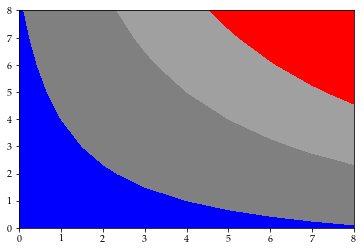

In [60]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

In [13]:
np.linspace(0,T,10)

array([0.        , 0.00011111, 0.00022222, 0.00033333, 0.00044444,
       0.00055556, 0.00066667, 0.00077778, 0.00088889, 0.001     ])

In [67]:
result[0,1]

0.0

In [77]:
state[1]

array([4.95563652e-07-0.00037071j])